In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [39]:
data_dir = "experiment_save/high_octane_mlp_512_batch_512_iter_1000"

(10001,)
(10001,)
(10001,)


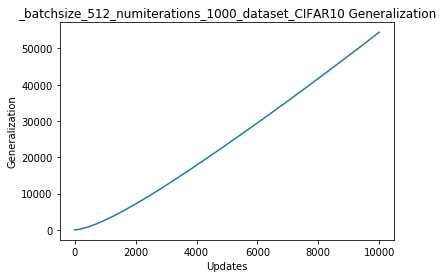

In [40]:
def plot_generalization(data_dir):
    
    spectral_file_path = None
    inv_file_path = None
    
    for dirpath, subdirs, files in os.walk(data_dir):
        for x in files:
            if x.endswith("-spectralnorm.npy"):
                spectral_file_path = os.path.join(dirpath, x)
            elif x.endswith("-invnorm.npy"):
                inv_file_path = os.path.join(dirpath, x)


    spectral_norm_lst = np.load(spectral_file_path)
    inv_norm_lst = np.load(inv_file_path)
    print(spectral_norm_lst.shape)
    print(inv_norm_lst.shape)    
    temp = []
    for i, s in enumerate(inv_norm_lst):
        temp.append(((s*1.0)*(i-1)) - i + 2)

    temp = np.array(temp)
    generalization_term = np.sqrt(np.add(spectral_norm_lst, temp))
    print(generalization_term.shape)
    plt.plot(generalization_term)
    plt.xlabel("Updates")
    plt.ylabel("Generalization")
    plt.title("_batchsize_512_numiterations_1000_dataset_CIFAR10 Generalization")
    
plot_generalization(data_dir)
    

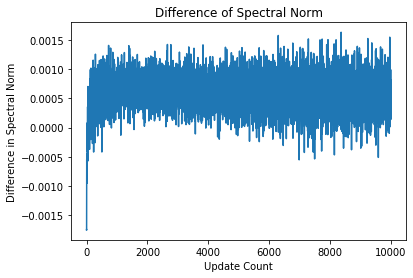

LOWEST EMPIRICAL LOSS 179


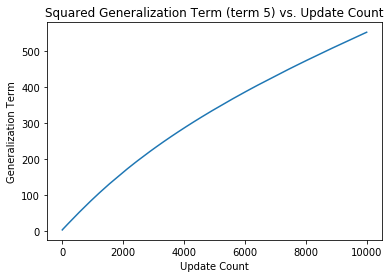

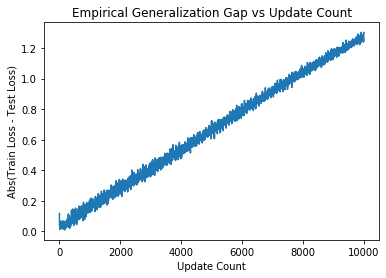

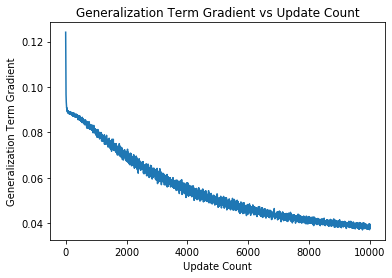

In [41]:
def running_avg(arr, n):
    cumsum, moving_aves = [0], []

    for i, x in enumerate(arr, 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=n:
            moving_ave = (cumsum[i] - cumsum[i-n])/n
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
    return np.array(moving_aves)

def new_plot_generalization(data_dir):
    
    spectral_file_path = None
    inv_file_path = None
    test_loss_path = None
    train_loss_path = None
    
    for dirpath, subdirs, files in os.walk(data_dir):
        for x in files:
            if x.endswith("-spectralnorm.npy"):
                spectral_file_path = os.path.join(dirpath, x)
            elif x.endswith("-invnorm.npy"):
                inv_file_path = os.path.join(dirpath, x)
            elif x.endswith("-testloss.npy"):
                test_loss_path = os.path.join(dirpath, x)
            elif x.endswith("-trainloss.npy"):
                train_loss_path = os.path.join(dirpath, x)


    spectral_norm_lst = np.load(spectral_file_path)
    inv_norm_lst = np.load(inv_file_path)
    test_loss = np.load(test_loss_path)
    train_loss = np.load(train_loss_path)

    generalization_term = np.add(spectral_norm_lst, np.sqrt(inv_norm_lst))
    temp_generalization_term = np.add(spectral_norm_lst, np.sqrt(inv_norm_lst))
    

    
    haha = np.diff(generalization_term)
    
    gradient_term = np.gradient(temp_generalization_term)
    empirical_loss = running_avg(np.abs(train_loss - test_loss), 5)
    
    spec_norm_gradient = np.gradient(spectral_norm_lst)
    
    plt.title("Difference of Spectral Norm")
    plt.xlabel("Update Count")
    plt.ylabel("Difference in Spectral Norm")
    plt.plot(spec_norm_gradient)
    plt.show()
    
    print("LOWEST EMPIRICAL LOSS " + str(np.argmin(empirical_loss)))
    
    plt.title("Squared Generalization Term (term 5) vs. Update Count")
    plt.xlabel("Update Count")
    plt.ylabel("Generalization Term")
    plt.plot(generalization_term)
    plt.show()
    
    
    plt.title("Empirical Generalization Gap vs Update Count")
    plt.xlabel("Update Count")
    plt.ylabel("Abs(Train Loss - Test Loss)")
    plt.plot(empirical_loss)
    plt.show()
    
    plt.title("Generalization Term Gradient vs Update Count")
    plt.xlabel("Update Count")
    plt.ylabel("Generalization Term Gradient")
    plt.plot(gradient_term)
    plt.show()
    
    
new_plot_generalization(data_dir)